In [ ]:
!pip install yfinance pandas numpy matplotlib scikit-learn tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Download TATASTEEL stock price data from Yahoo
df = yf.download('TATASTEEL.NS', start='2015-01-01', end='2024-12-31')
df = df[['Close']]  # Use only 'Close' prices
df.head()  # See the first 5 rows

/tmp/ipython-input-3-2185568836.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TATASTEEL.NS', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,TATASTEEL.NS
Date,
2015-01-01,13.538749
2015-01-02,13.749635
2015-01-05,13.948810
2015-01-06,13.272625
2015-01-07,13.018220


In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])  # 60 previous days
    y.append(scaled_data[i])       # 61st day

X = np.array(X)
y = np.array(y)

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0060
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 2.5947e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.2282e-04
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.6837e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.1342e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.6403e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 2.4643e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 1.3962e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.6696e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 1.5007e-04


In [ ]:
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


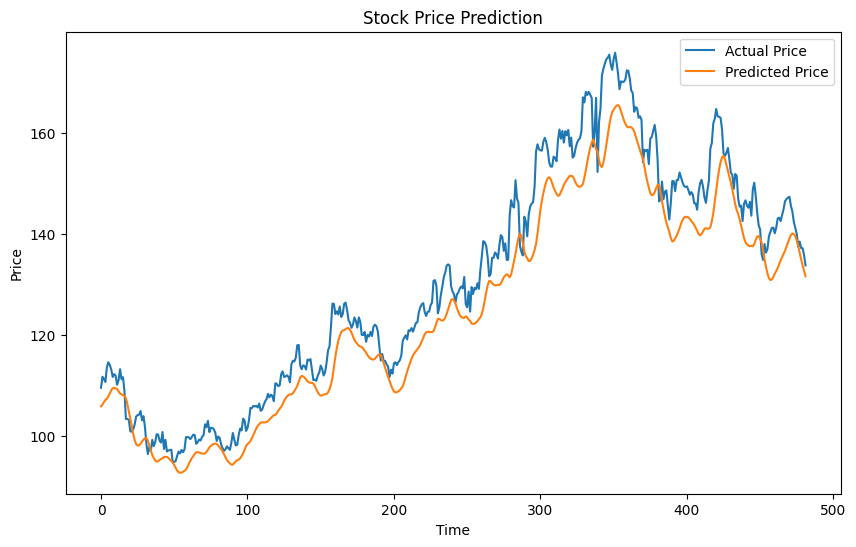

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()